In [23]:
#analyze the AmIA and JAMIA csv files
#aalize the AMia-1981-2021.csv file and the JAMIA-1994-2021.csv file

#import the csv module
# Import packages
import numpy as np
import pandas as pd
import chardet
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import string
import time

# Display plots inline
% matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC

from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, Embedding
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.merge import concatenate
from keras.optimizers import Adam
from keras.preprocessing.text import one_hot
from keras.callbacks import ModelCheckpoint 

from scipy import sparse, stats

data = pd.read_csv('C:/Users/admin/Music/Project/AMia-1981-2021.csv')
# statistical analisis of the data
print(data.describe())



UsageError: Line magic function `%` not found.


In [24]:
print(data.head())


    pmc_id                                              title  \
0  8075400  Association of White Matter Hyperintensity Pro...   
1  8075401  Mild Behavioral Impairment and Subjective Cogn...   
2  8075402  Safety Monitoring of Gene Therapy for Spinal M...   
3  8075403  Assessing the Progression of Alzheimer’s Disea...   
4  8075404  Investigating the Spatial Associations Between...   

           authors                                authors_information    year  \
0    Kentaro Hirao  aDepartment of Geriatric Medicine, Tokyo Medic...  2021.0   
1  Fumio Yamashita  bDepartment of Ultrahigh Field MRI, Institute ...  2021.0   
2    Akito Tsugawa  aDepartment of Psychiatry, University of Calga...  2021.0   
3      Rieko Haime  bDepartment of Clinical Neurosciences, Univers...  2021.0   
4   Raita Fukasawa  cDepartment of Community Health Sciences, Univ...  2021.0   

                                            abstract  
0  white matter hyperintensities wmh mri reported...  
1  mild beha

In [25]:
print(data.tail())

       pmc_id                                              title  \
5077  2581286  A Comparison of Models for Predicting the Outc...   
5078  2581287            Impact of Computers on Nursing Research   
5079  2581288  Microcomputer-Based Expert System for Clinical...   
5080  2581289  Impact of Computers on Nursing Administration ...   
5081  2581290  Medical Applications of a Spatial Data Managem...   

                              authors              authors_information  \
5077                Harriet H. Werley                Harriet H. Werley   
5078  Donna L. HudsonandThelma Estrin  Donna L. HudsonandThelma Estrin   
5079                 Virginia K. Saba                 Virginia K. Saba   
5080    Jane BarnettandDavid Kramlich    Jane BarnettandDavid Kramlich   
5081                William B. Hamlin                William B. Hamlin   

        year                                           abstract  
5077  1981.0  several basic strategy may employed design new...  
5078  1981.0  

In [26]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5082 entries, 0 to 5081
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pmc_id               5082 non-null   int64  
 1   title                5082 non-null   object 
 2   authors              5082 non-null   object 
 3   authors_information  5082 non-null   object 
 4   year                 5068 non-null   float64
 5   abstract             5080 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 238.3+ KB
None


In [27]:
print(data.columns)


Index(['pmc_id', 'title', 'authors', 'authors_information', 'year',
       'abstract'],
      dtype='object')


In [28]:

print(data.dtypes)

pmc_id                   int64
title                   object
authors                 object
authors_information     object
year                   float64
abstract                object
dtype: object


In [29]:
print(data.index)



RangeIndex(start=0, stop=5082, step=1)


In [30]:
print(data.values)

[[8075400
  'Association of White Matter Hyperintensity Progression with Cognitive Decline in Patients with Amnestic Mild Cognitive Impairment'
  'Kentaro Hirao'
  'aDepartment of Geriatric Medicine, Tokyo Medical University, Shinjuku-ku, Tokyo, Japan,'
  2021.0
  'white matter hyperintensities wmh mri reported increase risk conversion mild cognitive impairment mci alzheimers disease ad however effect progression wmh cognition mci remains unclear date']
 [8075401
  'Mild Behavioral Impairment and Subjective Cognitive Decline Predict Cognitive and Functional Decline'
  'Fumio Yamashita'
  'bDepartment of Ultrahigh Field MRI, Institute for Biomedical Sciences, Iwate Medical University, Iwate, Japan,'
  2021.0
  'mild behavioral impairment mbi subjective cognitive decline scd dementia risk state potentially represent neurobehavioral neurocognitive manifestation respectively early stage neurodegeneration mbi scd predict incident cognitive decline dementia associated known dementia biomarke

In [31]:
print(data.shape)


(5082, 6)


In [32]:
print(data.ndim)

2


In [33]:
print(data.size)


30492


In [34]:
print(data.memory_usage())


Index                    128
pmc_id                 40656
title                  40656
authors                40656
authors_information    40656
year                   40656
abstract               40656
dtype: int64


In [35]:
print(data.memory_usage(deep=True))


Index                      128
pmc_id                   40656
title                   768397
authors                 436172
authors_information     724726
year                     40656
abstract               3330256
dtype: int64


In [36]:
print(data.memory_usage(index=True, deep=True))

Index                      128
pmc_id                   40656
title                   768397
authors                 436172
authors_information     724726
year                     40656
abstract               3330256
dtype: int64


In [37]:
#importing nlp library
import nltk

#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [38]:
Data Exploration

SyntaxError: invalid syntax (<ipython-input-38-ac48eec2a9ac>, line 1)

In [42]:
# Check distribution of authors in the data
data['authors'].value_counts()

Alan W. Dove                                           22
Nicole LeBrasseur                                      16
William A. Wells                                       12
Hong Yu                                                 5
Christopher G. Chute                                    4
                                                       ..
L.R. Tinsley,G.C. Ashton,R.B. Boychuk, andD.J. Easa     1
Daphne Norwood                                          1
Nhan Do                                                 1
Sam Heard                                               1
Savita K. Sharma                                        1
Name: authors, Length: 4846, dtype: int64

In [45]:
# Create feature (text) and label (author) lists
authors_information = list(data['authors_information'].values)
authors = list(data['authors'].values)

print("The author dataset contains {} datapoints.".format(len(authors_information)))

The author dataset contains 5082 datapoints.


In [46]:
# Create word count and character count lists
word_count = []
char_count = []

for i in range(0, len(authors_information)):
    word_count.append(len(authors_information[i].split()))
    char_count.append(len(authors_information[i]))

In [47]:
# Convert lists to numpy arrays
word_count = np.array(word_count)
char_count = np.array(char_count)

# Calculate average word lengths
ave_length = np.array(char_count)/np.array(word_count)

In [48]:
def get_stats(var):
    """Print summary statistics for a variable of interest.
    
    Args:
    var: array. Numpy array containing values for the variable of interest.

    Returns:
    None
    """
    print("Min:", np.min(var))
    print("Max:", np.max(var))
    print("Mean:", np.mean(var))
    print("Median", np.median(var))
    print("1st percentile", np.percentile(var, 1))
    print("95th percentile", np.percentile(var, 95))
    print("99th percentile", np.percentile(var, 99))
    print("99.5th Percentile", np.percentile(var, 99.5))
    print("99.9th Percentile", np.percentile(var, 99.9))

In [49]:
print("Word count statistics")
get_stats(word_count)

Word count statistics
Min: 1
Max: 71
Mean: 10.044864226682408
Median 9.0
1st percentile 2.0
95th percentile 19.0
99th percentile 27.0
99.5th Percentile 30.0
99.9th Percentile 46.91900000000078


(0.0, 100.0)

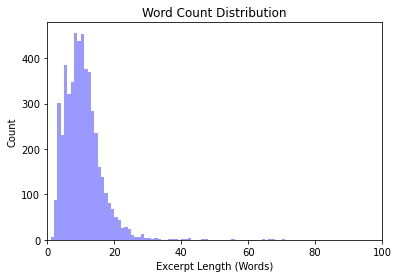

In [52]:
# Plot word count distribution
sns.distplot(word_count, kde = False, bins = 70, color = 'blue').set_title("Word Count Distribution")
plt.xlabel('Excerpt Length (Words)')
plt.ylabel('Count')
plt.xlim(0, 100)
# plt.savefig("word_count.eps")

In [53]:
print("\nCharacter count statistics")
get_stats(char_count)


Character count statistics
Min: 4
Max: 553
Mean: 77.53246753246754
Median 74.0
1st percentile 13.0
95th percentile 149.0
99th percentile 194.3799999999992
99.5th Percentile 233.57000000000153
99.9th Percentile 335.70400000001246


(0.0, 400.0)

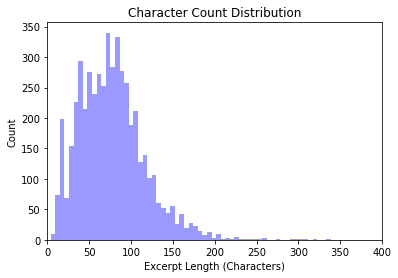

In [55]:
# Plot character count distribution
sns.distplot(char_count, kde = False, bins = 100, color = 'blue').set_title("Character Count Distribution")
plt.xlabel('Excerpt Length (Characters)')
plt.ylabel('Count')
plt.xlim(0, 400)
# plt.savefig("char_count.eps")

(0.0, 10.0)

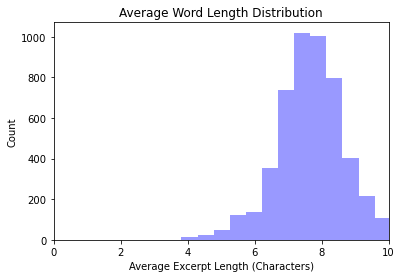

In [57]:
# Plot average excerpt length distribution
sns.distplot(ave_length, kde = False, bins = 70, color = 'blue').set_title("Average Word Length Distribution")
plt.xlabel('Average Excerpt Length (Characters)')
plt.ylabel('Count')
plt.xlim(0, 10)
# plt.savefig("ave_length.eps")

In [69]:
# Get word count outliers
word_outliers = np.where(word_count > 10)

for i in word_outliers[0]:
    print("Excerpt {} - Length: {}".format(i, word_count[i]))
    print(authors_information[i], "\n")

Excerpt 1 - Length: 14
bDepartment of Ultrahigh Field MRI, Institute for Biomedical Sciences, Iwate Medical University, Iwate, Japan, 

Excerpt 6 - Length: 11
eO’Brien Institute for Public Health, Cumming School of Medicine, Calgary, Canada, 

Excerpt 11 - Length: 16
bDepartment of Gerontopsychiatry, Central Institute of Mental Health, Medical Faculty Mannheim, University of Heidelberg, Heidelberg, Germany, 

Excerpt 14 - Length: 14
aCoimbra Institute for Biomedical Imaging and Translational Research (CIBIT), University of Coimbra, Coimbra, Portugal, 

Excerpt 15 - Length: 13
bInstitute for Nuclear Sciences Applied to Health (ICNAS), University of Coimbra, Coimbra, Portugal, 

Excerpt 18 - Length: 13
aILD Center of Excellence, Department of Pulmonology,St Antonius Hospital, CM, Nieuwegein, The Netherlands 

Excerpt 20 - Length: 11
cDepartment of Clinical Physics, St Antonius Hospital, CM, Nieuwegein, The Netherlands, 

Excerpt 21 - Length: 13
dDivision of Heart and Lungs, University Me

In [70]:
word_outliers = np.where(word_count < 2)

for i in word_outliers[0]:
    print("Excerpt {} - Length: {}".format(i, word_count[i]))
    print(authors_information[i], "\n")

Excerpt 2090 - Length: 1
3Medicine 

Excerpt 2552 - Length: 1
2Paediatrics 

Excerpt 2553 - Length: 1
3Psychology 

Excerpt 2628 - Length: 1
3Pediatrics 

Excerpt 2690 - Length: 1
4www.ideatel.org/acknowledgement.html 

Excerpt 2796 - Length: 1
2Pediatrics 

Excerpt 3141 - Length: 1
CMAJ 



In [71]:
# Get average length outliers
length_outliers = np.where(ave_length > 10)

for i in length_outliers[0]:
    print("Excerpt {} - Average Length: {}".format(i, ave_length[i]))
    print(authors_information[i], "\n")

Excerpt 303 - Average Length: 10.75
2Pharmacotherapy and Translational Research 

Excerpt 366 - Average Length: 11.0
1Interdisciplinary Nanoscience Centre, 
Aarhus University, 
Aarhus, 
Denmark, 

Excerpt 469 - Average Length: 10.125
1The Australian e-Health Research Centre, CSIRO, Brisbane/Sydney/Perth, Australia 

Excerpt 566 - Average Length: 11.125
*Immunology-Oncology Department, Sanofi-Synthelabo, F-34184 Montpellier cedex 04, France, 

Excerpt 568 - Average Length: 10.375
‡Analytical Research Department, Sanofi-Synthelabo, F-31036 Toulouse cedex, France, 

Excerpt 605 - Average Length: 10.25
Food Chemistry and Toxicology, University of Kaiserslautern, Erwin-Schroedinger-Strasse 52, D-67663 Kaiserslautern, Germany 

Excerpt 879 - Average Length: 11.0
3Dow AgroSciences, 9330 Zionsville Rd., Indianapolis, IN 46268 (moc.wod@rehsiflm;moc.wod@yeffetSLK) 

Excerpt 1077 - Average Length: 12.666666666666666
5Custodix, Sint-Martens-Latem, Belgium 

Excerpt 1364 - Average Length: 10.5
Indi

In [72]:
length_outliers = np.where(ave_length < 3.5)

for i in length_outliers[0]:
    print("Excerpt {} - Average Length: {}".format(i, ave_length[i]))
    print(authors_information[i], "\n")

Excerpt 4850 - Average Length: 3.3333333333333335
B. I. Blum 



In [74]:
# Create string containing all excerpts in lower case
text_string = ''

for i in range(len(authors_information)):
    text_string += authors_information[i].lower()

# Get character frequencies
char_cnt = Counter(text_string)
print(char_cnt)
print(len(char_cnt))

Counter({' ': 45825, 'e': 32078, 'a': 28917, 'i': 28251, 'n': 26446, 'o': 23299, 't': 22195, 'r': 20746, 's': 18729, 'c': 15176, 'l': 14734, ',': 14454, 'd': 11828, 'm': 10844, 'u': 9589, 'h': 9385, 'f': 7635, 'y': 7192, 'p': 6303, 'g': 6113, 'v': 4663, 'b': 4449, '.': 3922, 'k': 2400, '1': 2218, 'w': 2035, '2': 1755, '0': 1707, '3': 1293, 'j': 1205, '5': 900, '4': 898, '-': 783, '6': 664, '7': 642, '9': 589, 'z': 557, '8': 498, 'x': 489, '\n': 418, ';': 286, 'é': 247, 'q': 189, ')': 175, '(': 173, '’': 130, '&': 123, "'": 109, '/': 77, 'ó': 46, 'ã': 44, 'ö': 44, '†': 43, 'í': 41, '‡': 37, '*': 33, '@': 32, 'ü': 30, ':': 27, '§': 25, '‐': 23, 'á': 22, 'ô': 19, '–': 16, 'à': 14, 'è': 13, 'ä': 13, 'ê': 11, '+': 11, '"': 10, '#': 8, 'ñ': 8, '−': 7, 'ç': 7, '“': 6, '”': 6, '∥': 6, '¶': 6, 'ø': 6, '\r': 6, '[': 5, ']': 5, '⊥': 4, '|': 4, 'â': 3, '_': 3, '‘': 3, 'œ': 3, '¨': 2, '○': 2, 'ú': 2, 'ß': 2, '—': 2, '^': 2, 'ψ': 2, '∗': 1, 'ά': 1, 'ù': 1, '\u2009': 1, '▽': 1, '◆': 1, 'ć': 1, 'ò': 1

In [75]:
# Get character count dictionary keys
print(list(char_cnt.keys()))

['a', 'd', 'e', 'p', 'r', 't', 'm', 'n', ' ', 'o', 'f', 'g', 'i', 'c', ',', 'k', 'y', 'l', 'u', 'v', 's', 'h', 'j', '-', 'b', 'w', '’', 'í', '&', '.', 'q', '(', ')', 'x', '1', '2', '0', '3', '7', '6', '4', '5', 'z', '\n', ';', '/', '∗', '¨', '*', 'ά', ':', '@', 'à', '8', '9', 'ù', "'", '“', '”', '†', '‡', '§', '∥', '⊥', '#', '\u2009', 'é', 'ê', 'è', '▽', '○', 'ô', '◆', '¶', '−', 'ä', 'ü', 'â', 'ã', '–', '‐', 'ó', '_', 'á', 'ú', 'ç', 'ñ', '+', 'ć', 'ß', '‘', 'ø', 'ò', 'ö', 'œ', '—', '¥', '€', '^', '|', 'θ', 'γ', 'ψ', 'ł', '┴', '•', '®', '{', '}', 'φ', '"', 'ń', '\r', '\xa0', '[', ']', '~', 'ë']
